In [1]:
import sklearn
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
feature_text='label, lepton pT, lepton eta, lepton phi, lost energy mag, lost energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb'
features=[a.strip() for a in feature_text.split(',')]

dataset = pd.read_csv('newhiggs.csv', names=features)

In [25]:
from sklearn.model_selection import train_test_split
f = features[1:]

x_train, x_test, y_train, y_test = train_test_split(dataset[f], dataset['label'], stratify=dataset['label'])

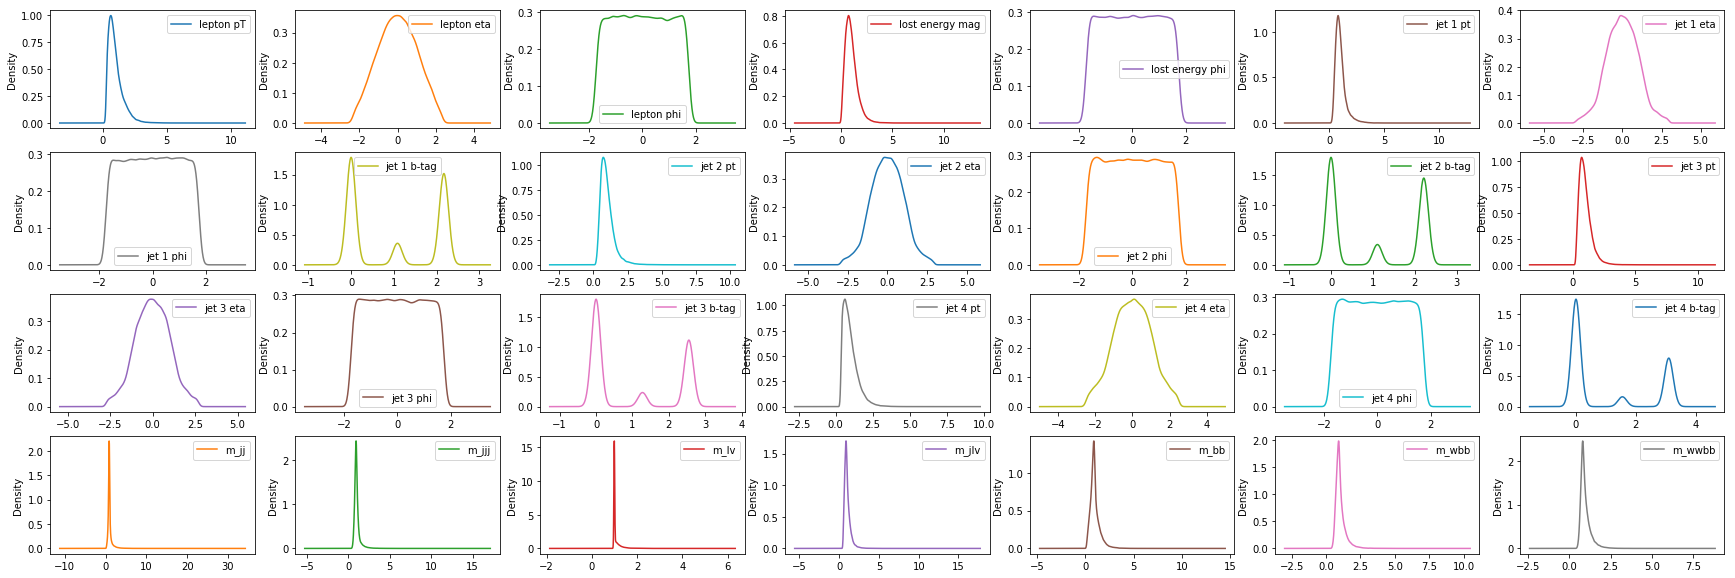

In [43]:
x_train.plot(kind='density', subplots=True, layout=(4,7), figsize = (30,10), sharex=False)
plt.show()

In [20]:
a = ['label','jet 3 b-tag', 'jet 1 b-tag', 'm_lv', 'm_jj', 'm_jjj', 'lost energy phi', 'm_bb']
custom_map = {0: 'boson absent', 1: 'boson present'}
dataset['label'] = dataset['label'].map(custom_map)

#x_train[a]

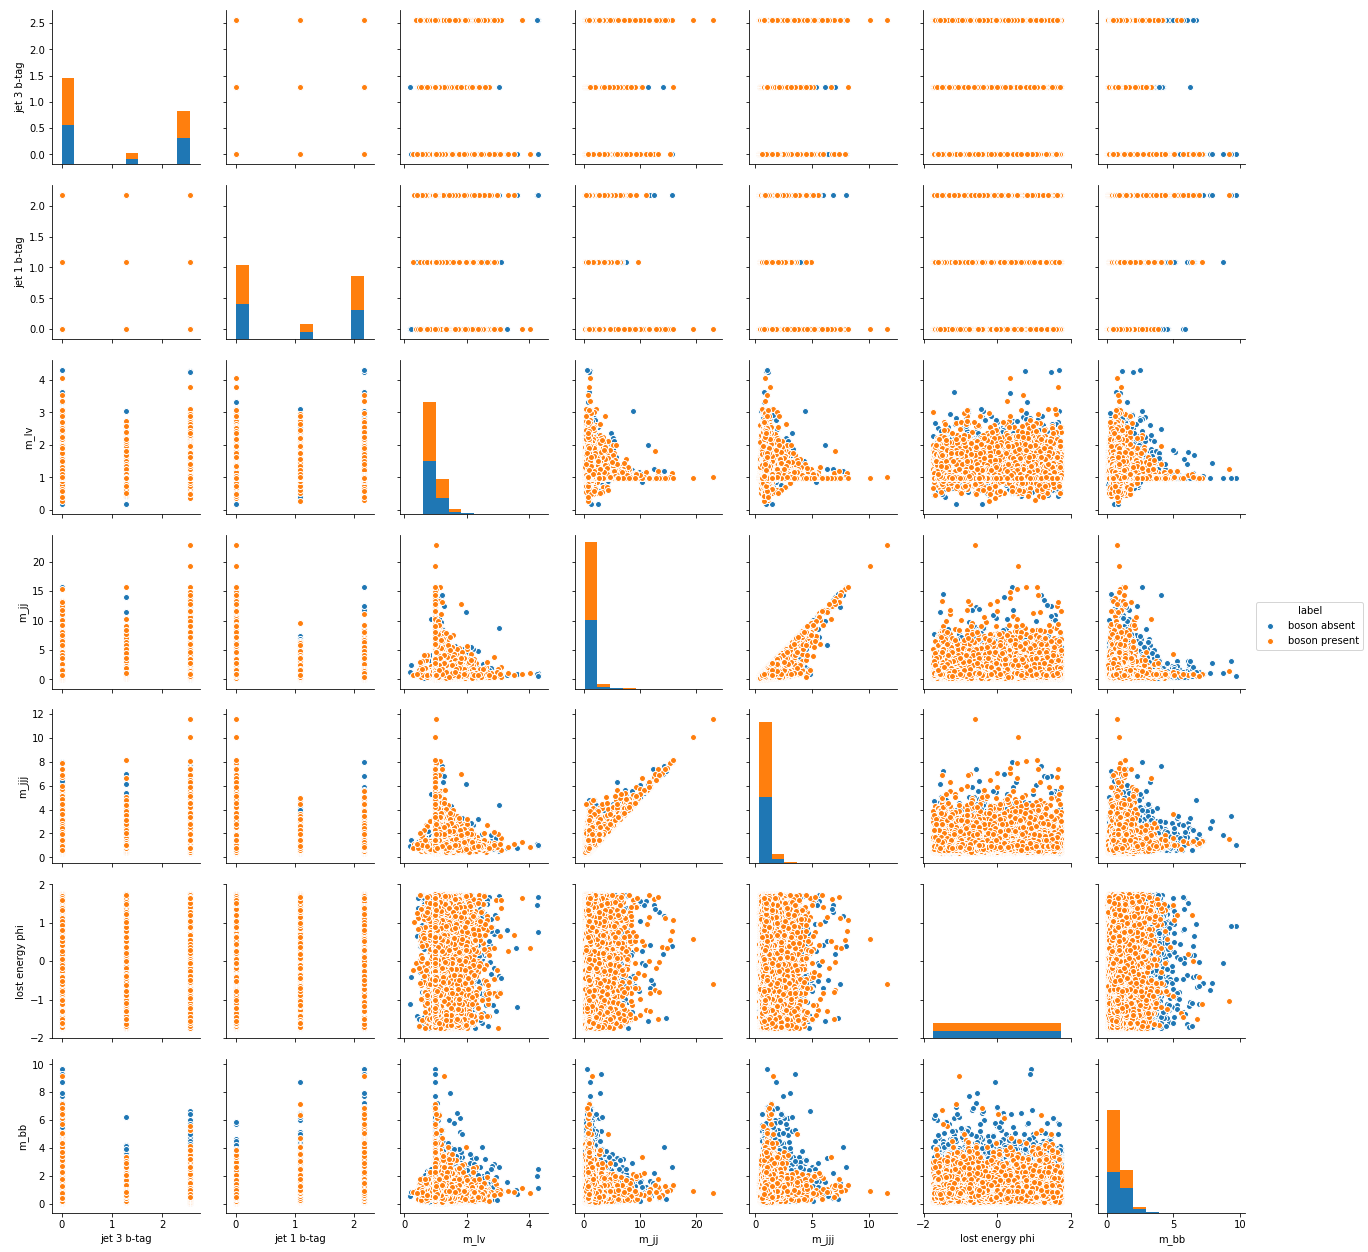

In [21]:
g = sns.pairplot(dataset[a], hue='label')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=8)

In [27]:
est.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
scores = pd.DataFrame(est.cv_results_)
scores.head()

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ut

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.351463,0.025886,0.608853,0.609107,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",55,0.607376,0.609192,0.60700,0.60968,0.612184,0.608448,0.012612,0.001366,0.002360,0.000507
1,0.362807,0.025466,0.608853,0.609107,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",55,0.607376,0.609192,0.60700,0.60968,0.612184,0.608448,0.033614,0.000353,0.002360,0.000507
2,0.350954,0.026935,0.605600,0.606573,1,2,10,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",57,0.607376,0.609192,0.60700,0.60968,0.602424,0.600848,0.085514,0.005464,0.002251,0.004053
3,0.277850,0.022527,0.601147,0.601907,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",59,0.601176,0.599572,0.59984,0.60530,0.602424,0.600848,0.012704,0.000209,0.001055,0.002455
4,0.297576,0.022910,0.601147,0.601907,1,3,5,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",59,0.601176,0.599572,0.59984,0.60530,0.602424,0.600848,0.035359,0.001371,0.001055,0.002455


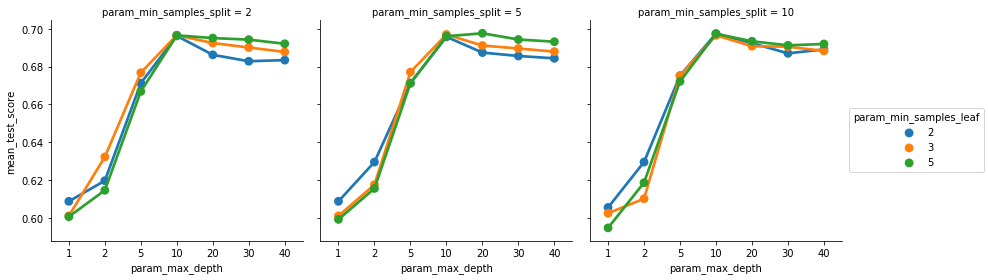

In [29]:
sns.factorplot(x='param_max_depth', y='mean_test_score',
               col='param_min_samples_split',
               hue='param_min_samples_leaf',
               data=scores);

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
clf = DecisionTreeClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])

In [34]:
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=8)

In [35]:
est.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
scores = pd.DataFrame(est.cv_results_)

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ut

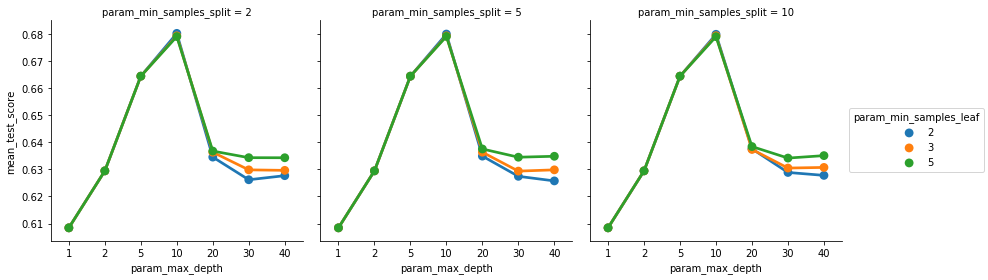

In [37]:
sns.factorplot(x='param_max_depth', y='mean_test_score',
               col='param_min_samples_split',
               hue='param_min_samples_leaf',
               data=scores);

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
clf = GaussianNB()

In [40]:
GaussianNB?